In [50]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
import itertools
from mixture_model import CategoricalMixture
from util import build_vae

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['legend.fontsize'] = 'large'
# plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "serif"
cm = plt.get_cmap('viridis_r')
plt.style.use('seaborn-paper')

In [18]:
def get_all_sequences(length, arr=False):
    N = 4**length
    if arr:
        base = [np.array([[1, 0, 0, 0]]), np.array([[0, 1, 0, 0]]), 
                np.array([[0, 0, 1, 0]]), np.array([[0, 0, 0, 1]])]
    else:
        base = 'ATCG'
    seq_lists = list(itertools.product(base, repeat=length))
    if arr:
        all_seq = np.zeros((N, length, 4))
    else:
        all_seq = ["A" * length] * N
    
    for i in range(N):
        if i % int(10**6) == 0 and i > 0:
            print("Sequences constructed: %i / %i" % (i, N))
        if arr:
            all_seq[i] = np.concatenate(seq_lists[i], axis=0)
        else:
            all_seq[i] = "".join(seq_lists[i])
    return all_seq

In [25]:
oracle = load_model("models/random_dna_oracle_10.h5")
oracle.compile('sgd', loss='mean_squared_error')
oracle_noise = 0.01

In [20]:
X_all = get_all_sequences(10, arr=True)
y_all = oracle.predict(X_all, batch_size=10000, verbose=1)[:, 0]

Sequences constructed: 1000000 / 1048576


In [48]:
target = np.percentile(y_all, 90)
training_min, training_max = np.percentile(y_all, 40), np.percentile(y_all, 50)

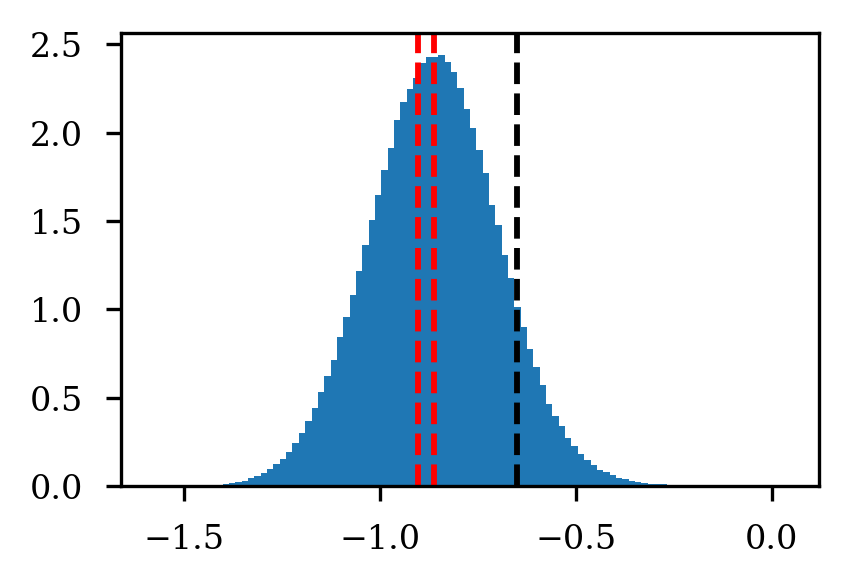

In [66]:
fig=plt.figure(figsize=(3, 2))
plt.hist(y_all, bins=100, density=True)
plt.axvline(target, c='k', ls='--')
plt.axvline(training_min, c='r', ls='--')
plt.axvline(training_max, c='r', ls='--')
plt.show()

In [67]:
np.random.seed(1)
poss_training_idxs = np.where(np.logical_and(np.greater_equal(y_all, training_min), np.less_equal(y_all, training_max)))[0]
n_train = 10000
